In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Sachin's World\OneDrive\Documents\MIT\MentorMind\Project\csv-files\main_csv _file\finalReport\User_Report.csv", header=None)

In [3]:
df.set_index(df.columns[0],inplace=True)

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,,,,,,,,,,,,,,,,,,,,,
1,A1,A1,A1,A1,A2,A1,A1,A1,A1,A1,...,A8,A4,A3,A4,A3,A1,A4,A3,A1,A1
2,A9,A9,A1,A1,A1,A1,A1,A10,A10,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A8,A1,A4,A3,A7,A7,A4,A7,A4,A8,...,A3,A1,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A1,A1,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#removing the null values
data=[] 
for i in range(71):#for 71 users
    x=df.values[i]
    x=x[~pd.isnull(x)] 
    data.append(x)
data   

[array(['A1', 'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'A1', 'A1', 'A1', 'A3',
        'A4', 'A3', 'A5', 'A6', 'A4', 'A7', 'A4', 'A7', 'A4', 'A7', 'A3',
        'A4', 'A8', 'A4', 'A3', 'A4', 'A3', 'A1', 'A4', 'A3', 'A1', 'A1'],
       dtype=object),
 array(['A9', 'A9', 'A1', 'A1', 'A1', 'A1', 'A1', 'A10', 'A10', 'A3',
        'A10', 'A10', 'A3'], dtype=object),
 array(['A8', 'A1', 'A4', 'A3', 'A7', 'A7', 'A4', 'A7', 'A4', 'A8', 'A4',
        'A7', 'A7', 'A3', 'A11', 'A4', 'A11', 'A3', 'A4', 'A4', 'A1', 'A8',
        'A4', 'A3', 'A1', 'A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1', 'A1', 'A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1', 'A1', 'A12', 'A3', 'A11', 'A3', 'A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A12', 'A12', 'A3', 'A1', 'A13', 'A5', 'A3', 'A10', 'A3', 'A1'],
       dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1', 'A10', 'A3', 'A1', 'A1', 'A3', 'A11', 'A3', 'A1'],
       dtype=object),
 array(

In [6]:
from markovclick import dummy #for markov algorithm i installaed markovclickstream packages
from markovclick.models import MarkovClickstream
m = MarkovClickstream(data)

<AxesSubplot:>

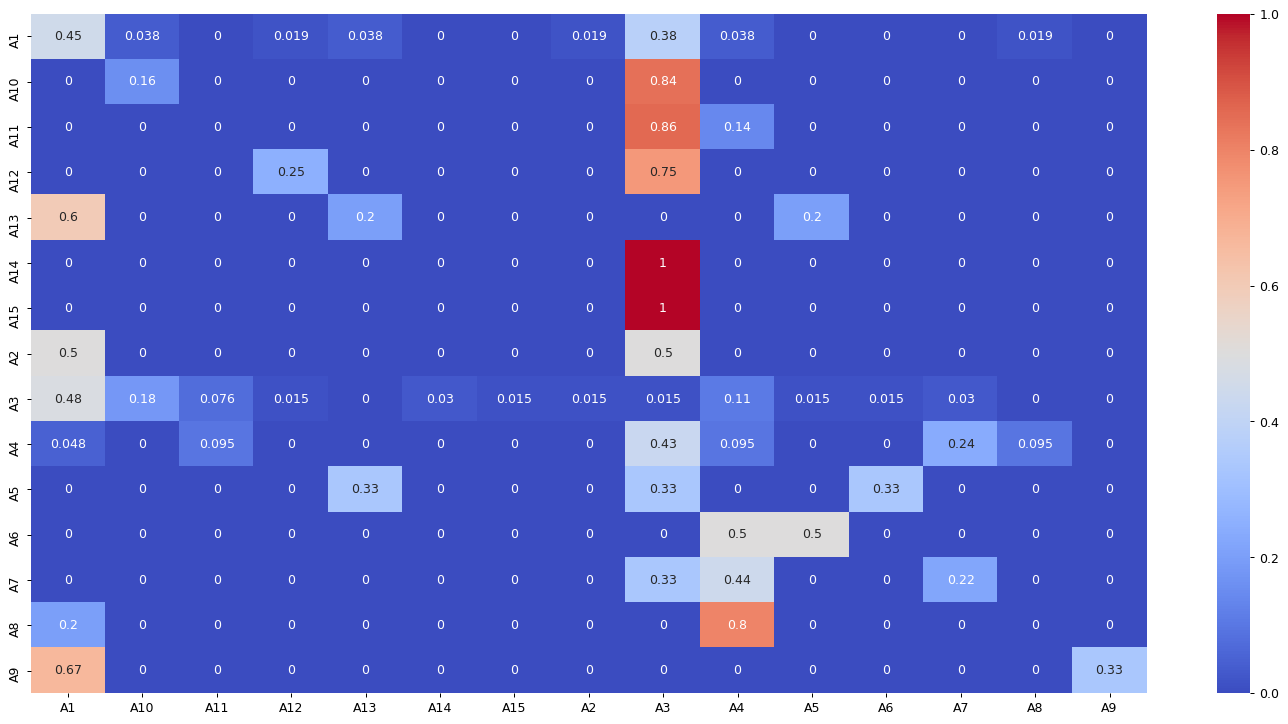

In [7]:
fig=plt.figure(figsize=(20,10), dpi=90, facecolor='w', edgecolor='k')
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages,cmap="coolwarm",annot=True)


In [11]:
!pip install graphviz
from graphviz import Digraph
from markovclick.viz import visualise_markov_chain #for creating markov chain digraph
markov_chain= visualise_markov_chain(m)

In [12]:
print(markov_chain.source)  

digraph {
	A1 [label=A1 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A1 -> A1 [label=0.45 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A1 -> A3 [label="   0.38" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A10 [label=A10 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A10 -> A3 [label=0.84 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A10 -> A10 [label="   0.16" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A11 [label=A11 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A11 -> A3 [label=0.86 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A11 -> A4 [label="   0.14" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A11 -> A11 [label="   0.00" arrowsize=0.5 color="#cfd8dc" fontname=Helvetica fontsize=10 penwidth=1.8]
	A12 [label=A12 

In [13]:
markov_chain.render("Markov_Chain.gv",view=True)#for creating markov chain

'Markov_Chain.gv.pdf'